## **Import librairies**

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.7 kB/s 
     |████████████████████████████████| 5.8 MB 28.3 MB/s 
     |████████████████████████████████| 1.6 MB 25.1 MB/s 
     |████████████████████████████████| 438 kB 26.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [3]:
import tensorflow as tf
print(tf.__version__)

2.9.1


#### **Basic Libraries**

In [14]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from glob import glob #to create dataframe from multiple files of same structure.

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier

import shap



## **Load the data**

Use glob() to list all the files that match a pattern and sort results

In [16]:
df = pd.read_csv('atp_matches_2000.csv')

# df = pd.read_csv('combined2000-2019.csv')

# combined = sorted(glob('atp_matches_*.csv'))
# combined

In [17]:
# df = pd.concat((pd.read_csv(file).assign(filename = file)
# for file in combined), ignore_index = True, axis=0)
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,...,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,...,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,...,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,...,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,...,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0


In [18]:
//df=df.iloc[:,0:32]
df.head()

SyntaxError: ignored

In [19]:
df.shape

(3378, 49)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3378 entries, 0 to 3377
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3378 non-null   object 
 1   tourney_name        3378 non-null   object 
 2   surface             3378 non-null   object 
 3   draw_size           3378 non-null   int64  
 4   tourney_level       3378 non-null   object 
 5   tourney_date        3378 non-null   int64  
 6   match_num           3378 non-null   int64  
 7   winner_id           3378 non-null   int64  
 8   winner_seed         1228 non-null   float64
 9   winner_entry        395 non-null    object 
 10  winner_name         3378 non-null   object 
 11  winner_hand         3378 non-null   object 
 12  winner_ht           3278 non-null   float64
 13  winner_ioc          3378 non-null   object 
 14  winner_age          3377 non-null   float64
 15  loser_id            3378 non-null   int64  
 16  loser_

In [10]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,...,31.1,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,...,24.3,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,...,26.5,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,...,18.4,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,...,23.7,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0


In [11]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon'],
      dtype='object')

## **Exploratory Data Analysis** 

The objective of this analysis is to come up with insights regarding the tournaments using different types of visualizations as tools to facilitate interpretation of the data and variables and communication of the results.




> Let's start with histograms to better understand the distribution of the key variables of our dataset based on multiple dimensions.




KeyError: ignored

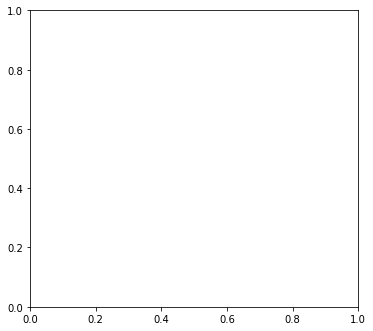

In [12]:
dimensions = ['winner_rank','loser_rank']

plt.figure(1, figsize=(20,12))

for i in range(1,3):
    plt.subplot(2,3,i)
    df[dimensions[i-1]].plot(kind='hist', title=dimensions[i-1])

> Let's now plot the correlation matrix and try to explore relations between features.





In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'Oranges')

We can see clearly that "minutes", "score", "1stIn", "_1stWon" ,"SvGms", "l_bpFaced", "l_bpSaved" and "svpt" features are highly correlated to each other. This is expected because they represent the result of a match.
Features like rank, rank_points, age and ht are important ones.

## **Data Preprocessing**

As first step, let's clean the data and retain only important features for our prediction task.

We proceed to the removal of features that are redundant/ correlated with each other, and those that are obviously not available before a match to predict.

"tourney_name" because it is redundant and replaceable by "tourney_id".

"minutes", "score", "1stIn", "_1stWon" ,"SvGms", "l_bpFaced", "l_bpSaved", "svpt" features because cannot be known in advance. (not done yet)

In [ ]:
df = df.drop(columns=['tourney_name','score','minutes', 'l_1stIn', 'l_1stWon', 'l_2ndWon','l_ace', 'l_svpt',
                      'l_SvGms','l_bpFaced','l_df', 'l_bpSaved',  'w_1stIn', 'w_1stWon','w_2ndWon', 'w_SvGms',
                      'w_ace', 'w_svpt','w_bpFaced', 'w_bpSaved','w_df'])
print("remained features ", df.columns)

Let's now count the number and the percentage of None values in our data set and treat features and entries that contain a lot of them.



In [ ]:
none_percent = df.isnull().sum() * 100 / len(df)
none_values_df = pd.DataFrame({'Feature name': df.columns, 'None values count': df.isnull().sum(),
                                 'None values percent': none_percent})
print(none_values_df.reset_index().drop(columns=['index']))

Since "rank_points" and "rank", which contain past performance of players, and "surface" features are important ones, we will delete the entries that do not contain information about them.

In [ ]:
df.dropna(subset=['winner_rank_points', 'loser_rank_points','winner_rank','loser_rank', 'surface'], inplace=True)
df = df.reset_index(drop=True)
df

To avoid analytical errors, we will convert numerical values of string format to float type.

In [ ]:
#not required/ already in float
numeric_columns = ['winner_rank', 'loser_rank']
df[numeric_columns] = df[numeric_columns].astype(float)


We will expand the "tourney_date" feature to new columns storing year and month attributes.

In [ ]:
#"tourney_date" is in the format of YYYYMMDD
df['tourney_year'] = df.tourney_date.astype(str).str[:4].astype(int)
df['tourney_month'] = df.tourney_date.astype(str).str[4:6].astype(int)
#Now drop "tourney_date"
df = df.drop(columns=['tourney_date'])
df

## **Feature Engineering**

For our supervised prediction model, we have to define our target feature!

We will transform our data so that we have 2 players (first player & second player), their respective personal informations (id, hand, age, etc) and general informations about the match and the tourney.

Then we will create a column "label" which is equal to 1 if player 1 wins, 0 if player 2 wins.

to do so, we will create a first copy of our dataset where the winner is considered as first player so label=0. Then a second copy where we inverse the places of the players so label=1.

In [ ]:
df = df.rename(columns={"loser_id": "first_id", 
                        "loser_rank": "first_rank", 
                        "loser_rank_points": "first_rank_points",
                 
                        "winner_id": "second_id",
                        "winner_rank": "second_rank", 
                        "winner_rank_points": "second_rank_points",
                       },)

Create second copy with inverse of positions



In [ ]:
copy_2_df = df.copy()
copy_2_df[[ 'first_id','first_rank','first_rank_points',
            'second_id','second_rank','second_rank_points']]\
=copy_2_df[['second_id','second_rank','second_rank_points',
             'first_id','first_rank','first_rank_points']]

Construct label feature

In [ ]:
winner_player2 = np.zeros(df.shape[0]) # second player wins so label=0
df['label'] = winner_player2


winner_player1 = np.ones(copy_2_df.shape[0]) # first player wins so label=1
copy_2_df['label'] = winner_player1 

df = pd.concat([df,copy_2_df])

#shuffle data
df = df.sample(frac=1).reset_index(drop=True)
df

For our prediction model, we have to encode categorical features. We will use LaberEncoder of Sklearn library.

In [ ]:
hand_encoder = LabelEncoder()

df['surface'] = LabelBinarizer().fit_transform(df['surface'].astype(str))

df['tourney_id'] = LabelEncoder().fit_transform(df['tourney_id'].astype(str))
df['round'] = LabelEncoder().fit_transform(df['round'].astype(str))

df.info()

In [ ]:
df

## **Prediction model**

Let's now train and execute our prediction model. For this we will use 2 differents models : RandomForest and XGBoost.

In [ ]:
y = df['label']
df_X = df.drop(columns='label')

In [ ]:
# split data : 80% for train and 20% for test.
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2)

#### **RandomForest classifier** 

Random Forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees.

In [ ]:
#Call the classifier
RF_classifier = RandomForestClassifier(n_estimators=100)
#fit the data
RF_classifier.fit(X_train, y_train)
#predict 
RF_predictions = RF_classifier.predict(X_test)

In [ ]:
print('Confusion matrix')
print(confusion_matrix(y_test,RF_predictions))
print('Classification report')
print(classification_report(y_test,RF_predictions))
print('Accuracy= ', accuracy_score(y_test, RF_predictions))

#### **XGBoost classifier**

Like Random Forests, Extreme Gradient Boosting is a set of decision trees. The two main differences are:

**How trees are built:** random forests builds each tree independently while gradient boosting builds one tree at a time. This additive model (ensemble) works in a forward stage-wise manner, introducing a weak learner to improve the shortcomings of existing weak learners.

**Combining results:** random forests combine results at the end of the process (by averaging or "majority rules") while gradient boosting combines results along the way.

In [ ]:
#Call the classifier
XGB_classifier = XGBClassifier()
#fit the data
XGB_classifier.fit(X_train, y_train)
#predict 
XGB_predictions = XGB_classifier.predict(X_test)

In [ ]:
print('Confusion matrix')
print(confusion_matrix(y_test,XGB_predictions))
print('Classification report')
print(classification_report(y_test,XGB_predictions))
print('Accuracy= ', accuracy_score(y_test, XGB_predictions))

#### **Feature importance**

We will use SHAP (SHapley Additive exPlanations) library which is a game theoretic approach to explain the output of any machine learning model. It will allow as visualize the behaviour of the classifer as well as the most important features used.

We will visualize the output of XGBoost model.

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(XGB_classifier)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:], matplotlib=True)

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

## Applying ANN for Classication/Prediction


In [ ]:
## Part 1
#Divide the dataset into Independent and Dependent features
X=df.iloc[:,0:12]
y=df.iloc[:,12]

In [ ]:
X.head()

In [ ]:
y

In [ ]:
# split data : 80% for train and 20% for test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
## Part 2
## ANN Part
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
## Let's initialisze the ANN
classifier=Sequential()

In [ ]:
## Adding the input layer
classifier.add(Dense(units=11, activation='relu')) 

In [ ]:
## Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
## Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
## Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

#ToDo: Save the model using pickling or H5 format

In [ ]:
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

In [ ]:
model_history.history.keys()

In [ ]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the prediction and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [ ]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

In [ ]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred)
score